<a href="https://colab.research.google.com/github/anshupandey/Deep-Learning-for-structured-Data/blob/main/code9_airline_passenger_volume_forecast_with_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LSTM - forecasting passenger volume at Chnagi Airport

## Data Collection and data preparation

In [ ]:
!wget -q https://storage.data.gov.sg/civil-aircraft-arrivals-departures-passengers-and-mail-changi-airport-monthly/civil-aircraft-arrivals-departures-passengers-and-mail-changi-airport-monthly.zip

In [ ]:
!unzip "civil-aircraft-arrivals-departures-passengers-and-mail-changi-airport-monthly.zip"

Archive:  civil-aircraft-arrivals-departures-passengers-and-mail-changi-airport-monthly.zip
 extracting: metadata-civil-aircraft-arrivals-departures-passengers-and-mail-changi-airport-monthly.txt  
 extracting: civil-aircraft-arrivals-departures-and-passengers-changi-airport-monthly.csv  
 extracting: volume-of-mail-changi-airport-monthly.csv  


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#load data
df = pd.read_csv(r"/content/civil-aircraft-arrivals-departures-and-passengers-changi-airport-monthly.csv")
df.shape

(974, 3)

In [ ]:
df.head()

,month,level_1,value
0,1980-01,Total Aircraft Arrivals And Departures,6501
1,1980-01,Total Passengers,566879
2,1980-02,Total Aircraft Arrivals And Departures,6112
3,1980-02,Total Passengers,552263
4,1980-03,Total Aircraft Arrivals And Departures,6391


In [ ]:
df = df[df.level_1=='Total Passengers']
df.shape

(487, 3)

In [ ]:
df.head()

,month,level_1,value
1,1980-01,Total Passengers,566879
3,1980-02,Total Passengers,552263
5,1980-03,Total Passengers,597644
7,1980-04,Total Passengers,561218
9,1980-05,Total Passengers,587003


In [ ]:
df.index = pd.to_datetime(df.month)
df = df[['value']]
df.head()

,value
month,
1980-01-01,566879
1980-02-01,552263
1980-03-01,597644
1980-04-01,561218
1980-05-01,587003


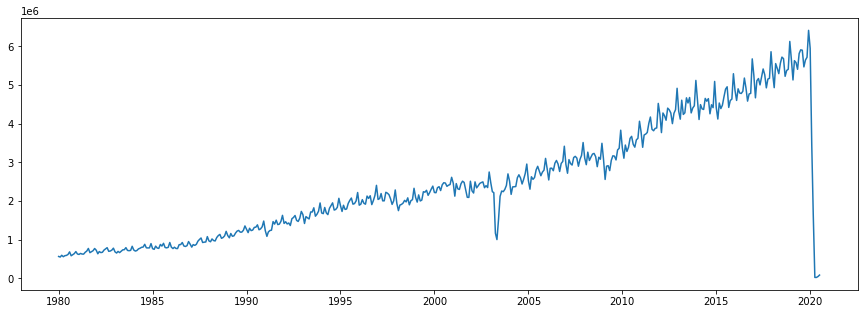

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(df)
plt.show()

In [ ]:
df2 = df['2005-01-01':'2018-12-01']
df2.shape

(168, 1)

In [ ]:
df2.head()

,value
month,
2005-01-01,2532594
2005-02-01,2307000
2005-03-01,2628115
2005-04-01,2561634
2005-05-01,2608397


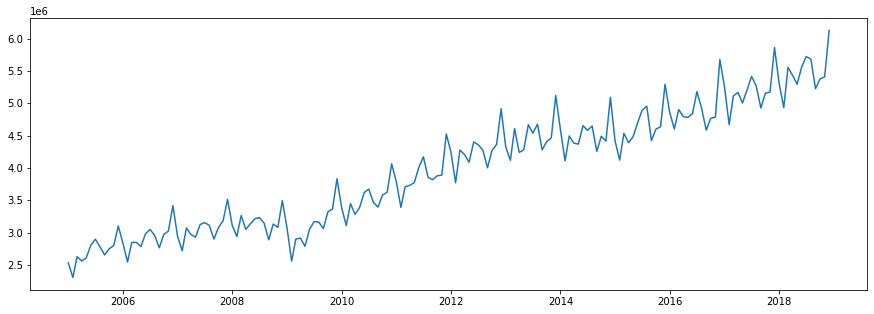

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(df2)
plt.show()

### Forecasting with sequence size = 1

In [ ]:
df3 = df2.copy()
df3['features'] = df3['value'].shift(1)
df3.head()

,value,features
month,,
2005-01-01,2532594,NaN
2005-02-01,2307000,2532594.0
2005-03-01,2628115,2307000.0
2005-04-01,2561634,2628115.0
2005-05-01,2608397,2561634.0


In [ ]:
df3.rename(columns={'value':'target'},inplace=True)
df3.dropna(inplace=True)
df3 = df3[['features','target']]
df3.head()

,features,target
month,,
2005-02-01,2532594.0,2307000
2005-03-01,2307000.0,2628115
2005-04-01,2628115.0,2561634
2005-05-01,2561634.0,2608397
2005-06-01,2608397.0,2806185


In [ ]:
x = df3.features.values
y = df3.target.values
print(x.shape,y.shape)

(167,) (167,)


In [ ]:
# samples, timsestamps, features
x = x.reshape(167,1,1)

#### Modelling LSTM for forecasting

In [ ]:
from tensorflow.keras import models,layers

In [ ]:
ip_layer = layers.Input(shape=(1,1))

# first lstm layer
lstm1 = layers.LSTM(15,activation='relu')(ip_layer)

h1 = layers.Dense(20,activation='relu')(lstm1)

op = layers.Dense(1)(h1)

model = models.Model(inputs=ip_layer,outputs=op)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1, 1)]            0         
_________________________________________________________________
lstm (LSTM)                  (None, 15)                1020      
_________________________________________________________________
dense (Dense)                (None, 20)                320       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 21        
Total params: 1,361
Trainable params: 1,361
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='mae',optimizer='adam')
model.fit(x,y,epochs=2000,shuffle=False)

Epoch 1/2000
6/6 [==============================] - 2s 4ms/step - loss: 4084663.2500
Epoch 2/2000
6/6 [==============================] - 0s 3ms/step - loss: 4053648.5000
Epoch 3/2000
6/6 [==============================] - 0s 3ms/step - loss: 4024704.7500
Epoch 4/2000
6/6 [==============================] - 0s 3ms/step - loss: 3997566.5000
Epoch 5/2000
6/6 [==============================] - 0s 3ms/step - loss: 3971937.7500
Epoch 6/2000
6/6 [==============================] - 0s 3ms/step - loss: 3950177.2500
Epoch 7/2000
6/6 [==============================] - 0s 4ms/step - loss: 3933546.2500
Epoch 8/2000
6/6 [==============================] - 0s 3ms/step - loss: 3915223.5000
Epoch 9/2000
6/6 [==============================] - 0s 3ms/step - loss: 3894445.2500
Epoch 10/2000
6/6 [==============================] - 0s 3ms/step - loss: 3870567.5000
Epoch 11/2000
6/6 [==============================] - 0s 3ms/step - loss: 3842936.2500
Epoch 12/2000
6/6 [==============================] - 0s 3ms/ste

In [ ]:
ytrue = df["2019-01-01":"2019-12-01"]['value']
ytrue.shape

(12,)

In [ ]:
ytrue

month
2019-01-01    5656076
2019-02-01    5131807
2019-03-01    5630780
2019-04-01    5580503
2019-05-01    5407308
2019-06-01    5816089
2019-07-01    5910782
2019-08-01    5900629
2019-09-01    5469342
2019-10-01    5646643
2019-11-01    5718386
2019-12-01    6414495
Name: value, dtype: int64

In [ ]:
def forecast(value,size):
  ans = []
  for i in range(size):
    value = np.array(value).reshape(-1,1,1)
    pred = model.predict(value)
    ans.append(pred[0])
    value = pred
  return np.array(ans)

In [ ]:
df['2018-12-01':'2018-12-01']['value'].values

array([6127843])

In [ ]:
ypred = forecast(df['2018-12-01':'2018-12-01']['value'].values,size=12)

In [ ]:
ypred = pd.DataFrame(ypred,index = ytrue.index)
ypred

,0
month,
2019-01-01,6172593.0
2019-02-01,6217670.5
2019-03-01,6263076.5
2019-04-01,6308814.5
2019-05-01,6354886.0
2019-06-01,6401294.0
2019-07-01,6448041.0
2019-08-01,6495129.0
2019-09-01,6542561.5


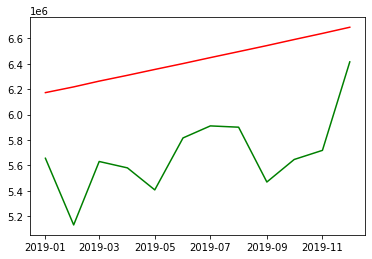

In [ ]:
plt.plot(ytrue,c='green')
plt.plot(ypred,c='red')
plt.show()

### Forecasting with sequence size = 12

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()

df3 = df2.copy()
df3['value'] = mm.fit_transform(df3[['value']])

df3.head()

,value
month,
2005-01-01,0.059043
2005-02-01,0.000000
2005-03-01,0.084043
2005-04-01,0.066643
2005-05-01,0.078882


In [ ]:
def split_sequence(sequence,n_steps):
  x = []
  y = []
  for i in range(len(sequence)):
    # get the end index of the pattern 
    end_ix = i + n_steps
    # check if the iteration is beyond the size of sequence, break the loop
    if end_ix > len(sequence)-1:
      break
    # collect the input and output parts of the pattern
    seq_x, seq_y = sequence[i:end_ix],sequence[end_ix]
    x.append(seq_x)
    y.append(seq_y)
  return np.array(x),np.array(y)

In [ ]:
x,y = split_sequence(df3.value,n_steps=12)
print(x.shape,y.shape)

(156, 12) (156,)


In [ ]:
# samples, features, timestamps
x = x.reshape(-1,12,1)
x.shape

(156, 12, 1)

#### Modelling LSTM for forecasting

In [ ]:
from tensorflow.keras import models,layers

In [ ]:
ip_layer = layers.Input(shape=(12,1))

# first lstm layer
lstm1 = layers.LSTM(50,activation='relu',return_sequences=True)(ip_layer)
lstm2 = layers.LSTM(80,activation='relu',return_sequences=True)(lstm1)
lstm3 = layers.LSTM(100,activation='relu',return_sequences=False)(lstm2)
op = layers.Dense(1)(lstm3)

model = models.Model(inputs=ip_layer,outputs=op)
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 12, 1)]           0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 12, 50)            10400     
_________________________________________________________________
lstm_6 (LSTM)                (None, 12, 80)            41920     
_________________________________________________________________
lstm_7 (LSTM)                (None, 100)               72400     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 101       
Total params: 124,821
Trainable params: 124,821
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='mae',optimizer='adam')
model.fit(x,y,epochs=1000,shuffle=False)

Epoch 1/1000
5/5 [==============================] - 3s 27ms/step - loss: 0.4341
Epoch 2/1000
5/5 [==============================] - 0s 27ms/step - loss: 0.3491
Epoch 3/1000
5/5 [==============================] - 0s 29ms/step - loss: 0.1642
Epoch 4/1000
5/5 [==============================] - 0s 27ms/step - loss: 0.1236
Epoch 5/1000
5/5 [==============================] - 0s 27ms/step - loss: 0.1323
Epoch 6/1000
5/5 [==============================] - 0s 27ms/step - loss: 0.1033
Epoch 7/1000
5/5 [==============================] - 0s 30ms/step - loss: 0.0948
Epoch 8/1000
5/5 [==============================] - 0s 30ms/step - loss: 0.0948
Epoch 9/1000
5/5 [==============================] - 0s 26ms/step - loss: 0.0724
Epoch 10/1000
5/5 [==============================] - 0s 26ms/step - loss: 0.0676
Epoch 11/1000
5/5 [==============================] - 0s 30ms/step - loss: 0.0633
Epoch 12/1000
5/5 [==============================] - 0s 32ms/step - loss: 0.0614
Epoch 13/1000
5/5 [==================

In [ ]:
ytrue = df["2019-01-01":"2019-12-01"]['value']
ytrue.shape

(12,)

In [ ]:
ytrue

month
2019-01-01    5656076
2019-02-01    5131807
2019-03-01    5630780
2019-04-01    5580503
2019-05-01    5407308
2019-06-01    5816089
2019-07-01    5910782
2019-08-01    5900629
2019-09-01    5469342
2019-10-01    5646643
2019-11-01    5718386
2019-12-01    6414495
Name: value, dtype: int64

In [ ]:
df['2018-01-01':'2018-12-01']['value'].values

array([5303639, 4932345, 5555117, 5430745, 5294980, 5565775, 5723094,
       5682688, 5225903, 5376234, 5408993, 6127843])

In [ ]:
ip = np.array(mm.transform(df['2018-01-01':'2018-12-01']).reshape(-1,1))
print(ip.shape)


(12, 1)


In [ ]:
ip.flatten().tolist()

[0.7842873941692972,
 0.687111456817252,
 0.8501048067141204,
 0.8175538748909599,
 0.7820211403609099,
 0.85289424349548,
 0.894068141506992,
 0.8834929883274449,
 0.7639421457516051,
 0.8032871279976697,
 0.8118608903846611,
 1.0]

In [ ]:
ans = []
value = ip.flatten().tolist()
for i in range(12):
  ip = np.array(value).reshape(1,12,1)
  pred = model.predict(ip)
  #print(i,pred,ip)
  value.pop(0)
  value.append(pred[0][0])
  ans.append(pred[0])

In [ ]:
ypred = np.array(ans)
ypred

array([[0.9057217 ],
       [0.8063438 ],
       [0.98497933],
       [0.95129377],
       [0.9162802 ],
       [0.9939646 ],
       [1.0158422 ],
       [1.022398  ],
       [0.92266506],
       [0.97123957],
       [0.987887  ],
       [1.056689  ]], dtype=float32)

In [ ]:
ypred = mm.inverse_transform(ypred)

In [ ]:
ypred = pd.DataFrame(ypred,index = ytrue.index)
ypred

,0
month,
2019-01-01,5767620.5
2019-02-01,5387913.0
2019-03-01,6070451.5
2019-04-01,5941744.0
2019-05-01,5807963.0
2019-06-01,6104782.5
2019-07-01,6188373.5
2019-08-01,6213422.5
2019-09-01,5832358.5


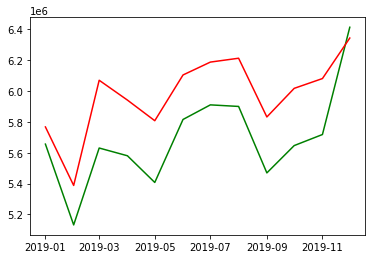

In [ ]:
plt.plot(ytrue,c='green')
plt.plot(ypred,c='red')
plt.show()